
There were used 10000 uniform random numbers for the production of 10000 Rayleigh numbers with the Inverse Tranformation method
The 27.950000 percent of those waves are between 3 and 5 meters



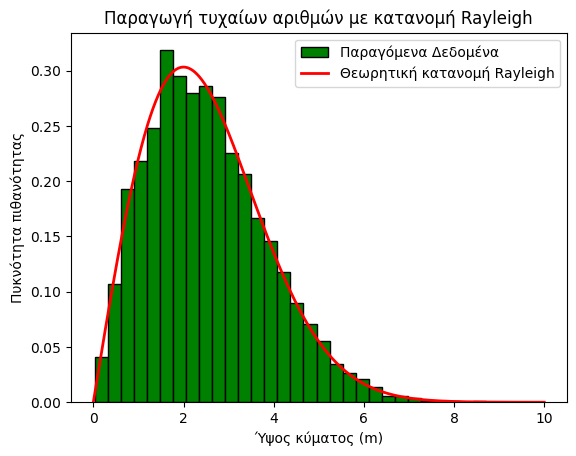

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Παράμετροι της κατανομής Rayleigh 
σ = 2
N = 10000

# Δημιουργία N ομοιόμορφα κατανεμημένων τυχαίων αριθμών U 
U = np.random.rand(N)

# Εφαρμογή του αντίστροφου μετασχηματισμού για την παραγωγή τυχαίων αριθμών Rayleigh
X = σ * np.sqrt(-2 * np.log(U))

# Έλενχος αριθμού κυμάτων τα οποία έχουν ύψος 3<x<5 [m] και τυχαίων αριθμών που χρειάστηκαν
acc = 0 # Aρχικοποίηση του μετρητή

for i in range(N):
    if 3 < X[i] <5: # Ελέγχος αν το ύψος του κάθε κύματος βρίσκεται μεταξύ του 3 και 5
        acc += 1

per = acc / N*100
print('\nThere were used %d uniform random numbers for the production of %d Rayleigh numbers with the Inverse Tranformation method' % (N, N) )
print('The %f percent of those waves are between 3 and 5 meters\n' % per)

# Σχεδίαση του γραφήματος θεωρητικής και παραγόμενης κατανομής.
plt.hist(X, bins=30, color='green',ec='black',density=True, label ='Παραγόμενα Δεδομένα')

# Υπολογισμός της θεωρητικής κατανομής Rayleigh απο τον γνωστό τύπο για σύγκριση
x = np.linspace(0, 10, 1000)
rayleigh_pdf = (x / σ**2) * np.exp(-x**2 / (2 * σ**2))
plt.plot(x, rayleigh_pdf, 'r-', linewidth=2, label='Θεωρητική κατανομή Rayleigh')

# ΣΗμειώσεις πάνω στο διάγραμμα
plt.title('Παραγωγή τυχαίων αριθμών με κατανομή Rayleigh')
plt.xlabel('Ύψος κύματος (m)')
plt.ylabel('Πυκνότητα πιθανότητας')
plt.legend()
plt.show()



There were used 3217 uniform random numbers for the production of 10000 Rayleigh numbers with the Inverse Tranformation method
The 28.940006 percent of those waves are between 3 and 5 meters



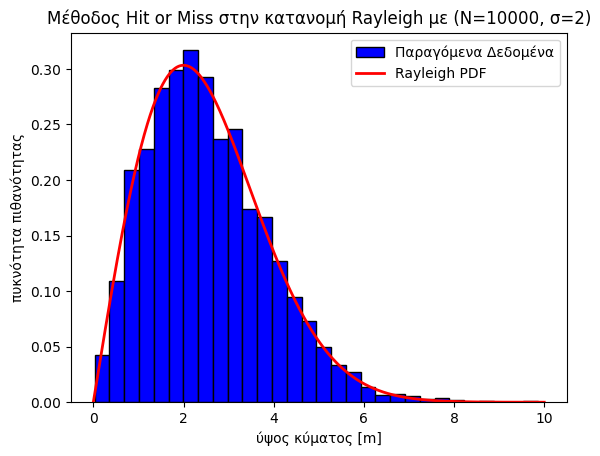

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Ορισμός της συνάρτησης πυκνότητας πιθανότητας Rayleigh
def pdf(x, σ):
    temp = (x / σ**2) * np.exp(-x**2 / (2 * σ**2))
    return temp

# Παράμετροι του προβλημαος
σ = 2
N = 10000  
x_max = 10 
y_max = pdf(σ, σ)  # μέγιστη τιμή της συνάρτησης πυκνότητας 

# Βρόχος for για γεννήτρια (x, y) και έλεγχοσ συνθήκης
hits = []
for _ in range(N):
    x = np.random.uniform(0, x_max)
    y = np.random.uniform(0, y_max)   
    if y<= pdf(x,σ):
        hits.append(x) # Προσθήκη του στοιχείου στο array με τις επιτυχίες
        
# Έλενχος αριθμού κυμάτων τα οποία έχουν ύψος 3<x<5 [m] και τυχαίων αριθμών που χρειάστηκαν
acc = 0
count = 0 # Αρχικοποίηση του μετρητή επιτυχιών (αριθμών που χρησιμοποιήθηκαν)

for i in hits: # Βρόχος for για τα κύματα τα κύματα που έγιναν αποδεκτά
    count += 1
    if 3 < i < 5 :
        acc += 1

per = acc/len(hits)*100
print('\nThere were used %d uniform random numbers for the production of %d Rayleigh numbers with the Inverse Tranformation method' % (count, N) )
print('The %f percent of those waves are between 3 and 5 meters\n' % per) 

# Σχεδίαση ιστογράμματος και θεωρητικής κατανομής
plt.hist(hits, bins=30, density=True, color='blue', ec='black', label="Παραγόμενα Δεδομένα")

x2 = np.linspace(0, 10, 1000)
plt.plot(x2, pdf(x2, σ), 'r-', lw=2, label="Rayleigh PDF")

# σημειώσεις φιαγραμματος
plt.title(f"Μέθοδος Hit or Miss στην κατανομή Rayleigh με (N={N}, σ={σ})")
plt.xlabel("ύψος κύματος [m]")
plt.ylabel("πυκνότητα πιθανότητας")
plt.legend()
plt.show()

